> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No show appointments analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
does Age is significant in the results of showed or no showed people?
doed Diabetes is significant or not in show and no-show results?


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

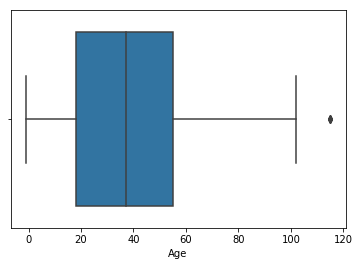

In [7]:
sns.boxplot(df.Age)
plt.show()

In [8]:
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df[df.Age > 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


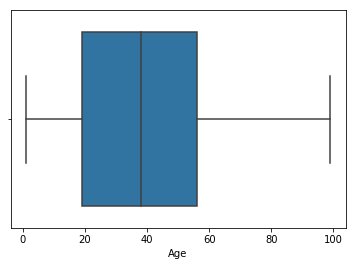

In [10]:
df = df[(df.Age > 0) & (df.Age < 100)]

sns.boxplot(df.Age)
plt.show()

In [11]:
df.drop(['Scholarship', 'AppointmentID', 'AppointmentDay', 'ScheduledDay','PatientId'], axis = 1, inplace=True)
df.head()


,Gender,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,1,1,0,0,0,No


In [12]:
df.rename(columns={'Hipertension': 'hypertention'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,hypertention,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,1,1,0,0,0,No


In [13]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,hypertention,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,1,1,0,0,0,No


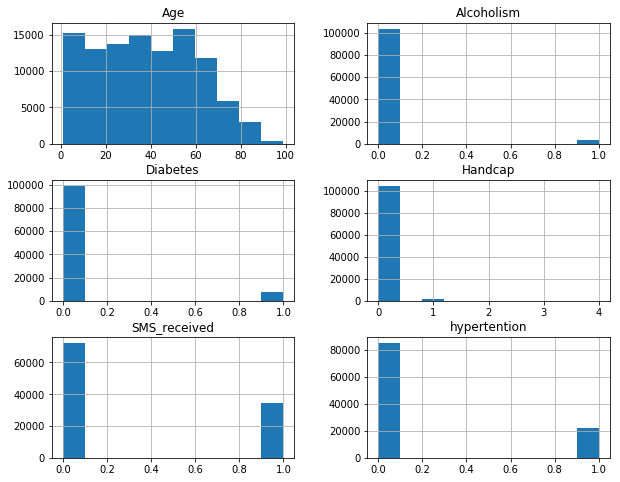

In [14]:
df.hist(figsize=(10, 8));

In [15]:
df.fillna(df.mean(), inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106976 entries, 0 to 110526
Data columns (total 9 columns):
Gender           106976 non-null object
Age              106976 non-null int64
Neighbourhood    106976 non-null object
hypertention     106976 non-null int64
Diabetes         106976 non-null int64
Alcoholism       106976 non-null int64
Handcap          106976 non-null int64
SMS_received     106976 non-null int64
No_show          106976 non-null object
dtypes: int64(6), object(3)
memory usage: 8.2+ MB


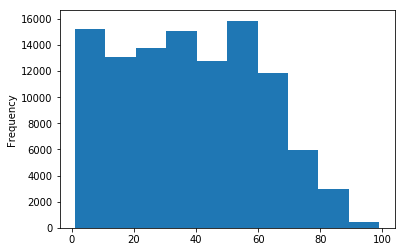

Mean Age: 38.31


In [16]:
df.Age.plot.hist()
plt.show()
print('Mean Age: {:.2f}'.format(df.Age.mean()))

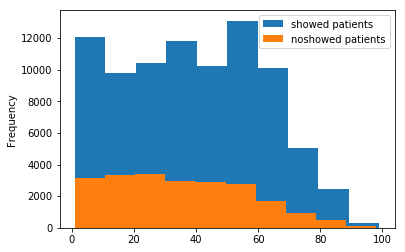

showed patients mean Age:39.07
noshowed patients mean Age:35.32


In [26]:
showed = (df.No_show == 'No')
noshowed = (df.No_show == 'Yes')
df[showed].Age.plot.hist()
df[noshowed].Age.plot.hist()
plt.legend(['showed patients', 'noshowed patients'])
plt.show()
print('showed patients mean Age:{:.2f}'.format(df[showed].Age.mean()))
print('noshowed patients mean Age:{:.2f}'.format(df[noshowed].Age.mean()))




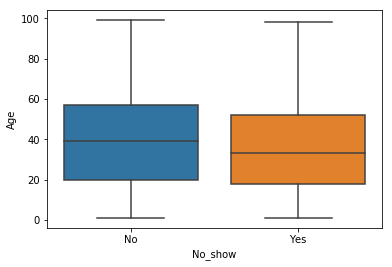

In [18]:
sns.boxplot(x=df.No_show, y=df.Age)
plt.show()

### Research Question 2  (Does Diabetes is significant or not in show and No-show results )

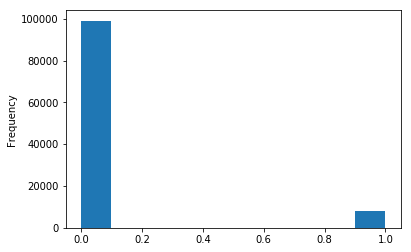

Mean Diabetes: 0.07


In [19]:
df.Diabetes.plot.hist()
plt.show()
print('Mean Diabetes: {:.2f}'.format(df.Diabetes.mean()))


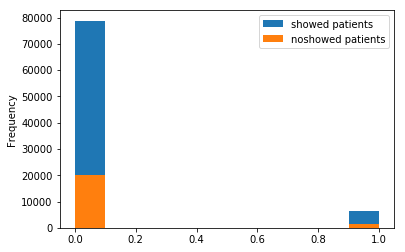

showed patients mean Diabetes:0.08
noshowed patients mean Diabetes:0.07


In [20]:
showed = (df.No_show == 'No')
noshowed = (df.No_show == 'Yes')
df[showed].Diabetes.plot.hist()
df[noshowed].Diabetes.plot.hist()
plt.legend(['showed patients', 'noshowed patients'])
plt.show()
print('showed patients mean Diabetes:{:.2f}'.format(df[showed].Diabetes.mean()))
print('noshowed patients mean Diabetes:{:.2f}'.format(df[noshowed].Diabetes.mean()))

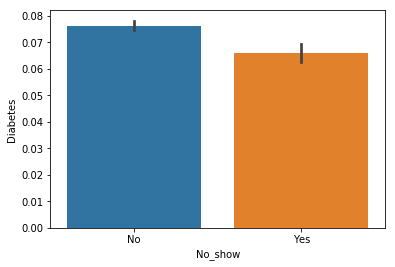

In [21]:
sns.barplot(x=df.No_show, y=df.Diabetes)
plt.show()

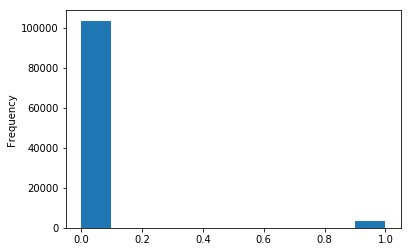

Mean Alcoholism: 0.03


In [22]:
df.Alcoholism.plot.hist()
plt.show()
print('Mean Alcoholism: {:.2f}'.format(df.Alcoholism.mean()))

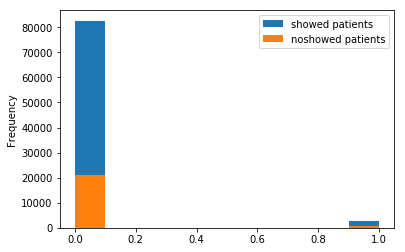

showed patients mean Alcoholism:0.03
noshowed patients mean Alcoholism:0.03


In [23]:
showed = (df.No_show == 'No')
noshowed = (df.No_show == 'Yes')
df[showed].Alcoholism.plot.hist()
df[noshowed].Alcoholism.plot.hist()
plt.legend(['showed patients', 'noshowed patients'])
plt.show()
print('showed patients mean Alcoholism:{:.2f}'.format(df[showed].Alcoholism.mean()))
print('noshowed patients mean Alcoholism:{:.2f}'.format(df[noshowed].Alcoholism.mean()))

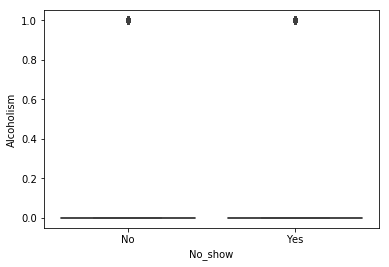

In [24]:
sns.boxplot(x=df.No_show, y=df.Alcoholism)
plt.show()

<a id='conclusions'></a>
## Conclusions
- As we can see diadetes is not significant in showed and no showed results.
- As we can see in the investigation the age is the most important factor that decided if a patient would or not.
- As we can see about 23% of people that schedule an appointment didnot make it to thier appointment.
- the feature such as different gender or alcoholic is not a factor to decide if the patient would come to this appointment or not. 

### Limitations
Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employeed or not, or whether the patient have a series medical issues or not.
there we some illogical data such as patients with age 0 or less
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0